In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from my_helper.regression import *
from my_helper.util import *
from my_helper.plot import *
from my_helper.analysis import *
from yjk_module.preprocessing import *
from yjk_module.ml_module import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.gridspec import GridSpec

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 읽기

In [3]:
origin = pd.read_csv("./data/Walmart_sales.csv")
df = origin.copy()

### EDA(1)

#### 상위 5개 데이터 샘플 및 데이터 크기

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.shape

(6435, 8)

#### 데이터 타입

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


#### 기술통계

In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
df.describe(include = 'O')

,Date
count,6435
unique,143
top,05-02-2010
freq,45


#### 특정 컬럼 값 종류 확인

In [9]:
df['Store'].value_counts()

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

- 종속변수는 'Weekly_Sales'
- Date 열은 Object 타입으로 출력된 시계열 데이터
- Store는 수치형 데이터로 기입되었지만 실제로는 마켓의 구분을 위한 데이터로 서열 척도가 아니다.
  - 각 Store의 데이터 개수는 모두 같다
- Holiday_Flag 열은 휴일 여부를 나타내는 더미화된 명목형 데이터
- Temperature, Fuel_Price, CPI, Unemployment는 연속형 데이터

### 순수 데이터 선형회귀 적용
- Date는 별도 변환 없이는 사용할 수 없으므로 제외, 그외 연속형 데이터는 스케일링 적용

In [10]:
X = df.copy()
Y = X.pop('Weekly_Sales')

In [11]:
pp = YjkPreprocessor()
pp.set_strategy(outline = None, null = None, scaler = 's', encoder = 'o')

아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 처리하지 않음 |
| 결측치 처리 | 처리하지 않음 |
| 스케일러    | 표준화        |
| 인코딩      | 원핫인코딩    |
+-------------+---------------+


In [12]:
X_p = pp.fit_transform(X.drop('Date', axis = 1))

데이터프레임 크기 : (6435, 6)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 총 6개


In [13]:
results = []

def add_result(model, note, x_test, y_test):
    global results
    tmp_dict = {}
    tmp_dict['How'] = note
    tmp_dict['R2_Score'] = model.score(x_test, y_test)
    tmp_dict['MAE'] = mean_absolute_error(y_test, model.predict(x_test))
    tmp_dict['RMSE'] = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    tmp_dict['model'] = model
    results.append(tmp_dict)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.2, random_state = 0)

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.132665 |
+----+-------------------+

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.134674 |     0.168227 |
| 평균절대오차(MAE)             |       433297 |       419079 |
| 평균제곱오차(MSE)             |  2.76085e+11 |  2.62892e+11 |
| 평균오차(RMSE)                |       525438 |       512730 |
| 평균 절대 백분오차 비율(MAPE) |      61.5256 |      59.3264 |
| 평균 비율 오차(MPE)           |     -35.6388 |     -34.1325 |
+-------------------------------+--------------+--------------+

[학습곡선]


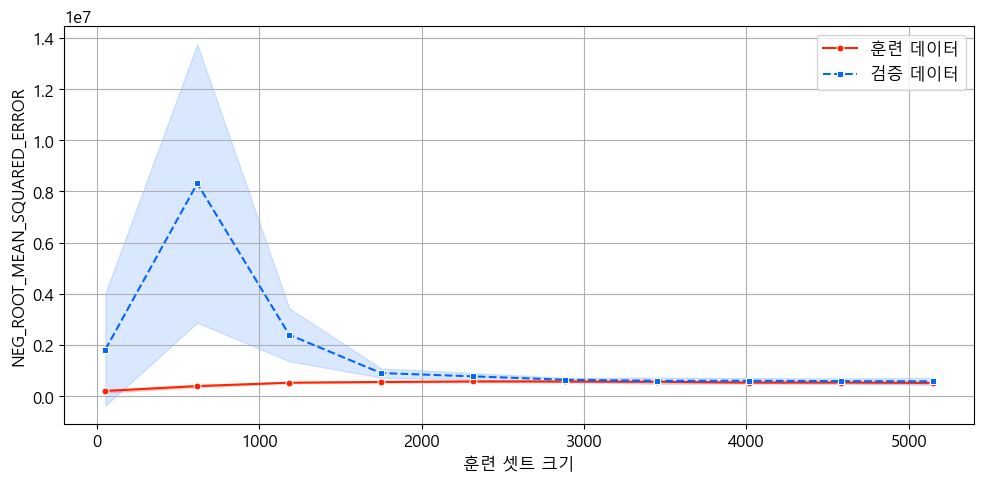

In [15]:
model_o = my_linear_regression(x_train, y_train, x_test, y_test, dpi = 100, report = False)
add_result(model_o, '순수 데이터', x_test, y_test)

### 데이터 전처리(1)

- 적합한 형태로 데이터를 변환
  - Date열은 Datetime 타입으로, Store는 category 타입으로 변환

In [16]:
df['Date'].head()

0    05-02-2010
1    12-02-2010
2    19-02-2010
3    26-02-2010
4    05-03-2010
Name: Date, dtype: object

- Date 열은 DD-MM-YYYY 형태로 확인됨

In [17]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
df['Store'] = df['Store'].astype('category')
df['Holiday_Flag'] = df['Holiday_Flag'].astype('category')

In [18]:
df['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [19]:
df['Date'].dt.day_of_week.value_counts()

Date
4    6435
Name: count, dtype: int64

- 주간 매출 통계의 기준점은 4(금요일)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 315.9 KB


- 편의를 위하여 온도는 섭씨로 변경

In [21]:
df['Temperature'] = (df['Temperature'] - 32) / 1.8

In [22]:
df.describe(include = 'all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.0,6435,6.435000e+03,6435.0,6435.000000,6435.000000,6435.000000,6435.000000
unique,45.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
top,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
freq,143.0,NaN,NaN,5985.0,NaN,NaN,NaN,NaN
mean,NaN,2011-06-17 00:00:00,1.046965e+06,NaN,15.924324,3.358607,171.578394,7.999151
min,NaN,2010-02-05 00:00:00,2.099862e+05,NaN,-18.922222,2.472000,126.064000,3.879000
25%,NaN,2010-10-08 00:00:00,5.533501e+05,NaN,8.588889,2.933000,131.735000,6.891000
50%,NaN,2011-06-17 00:00:00,9.607460e+05,NaN,17.038889,3.445000,182.616521,7.874000
75%,NaN,2012-02-24 00:00:00,1.420159e+06,NaN,23.855556,3.735000,212.743293,8.622000
max,NaN,2012-10-26 00:00:00,3.818686e+06,NaN,37.855556,4.468000,227.232807,14.313000


### EDA(2)

#### 산점도 행렬

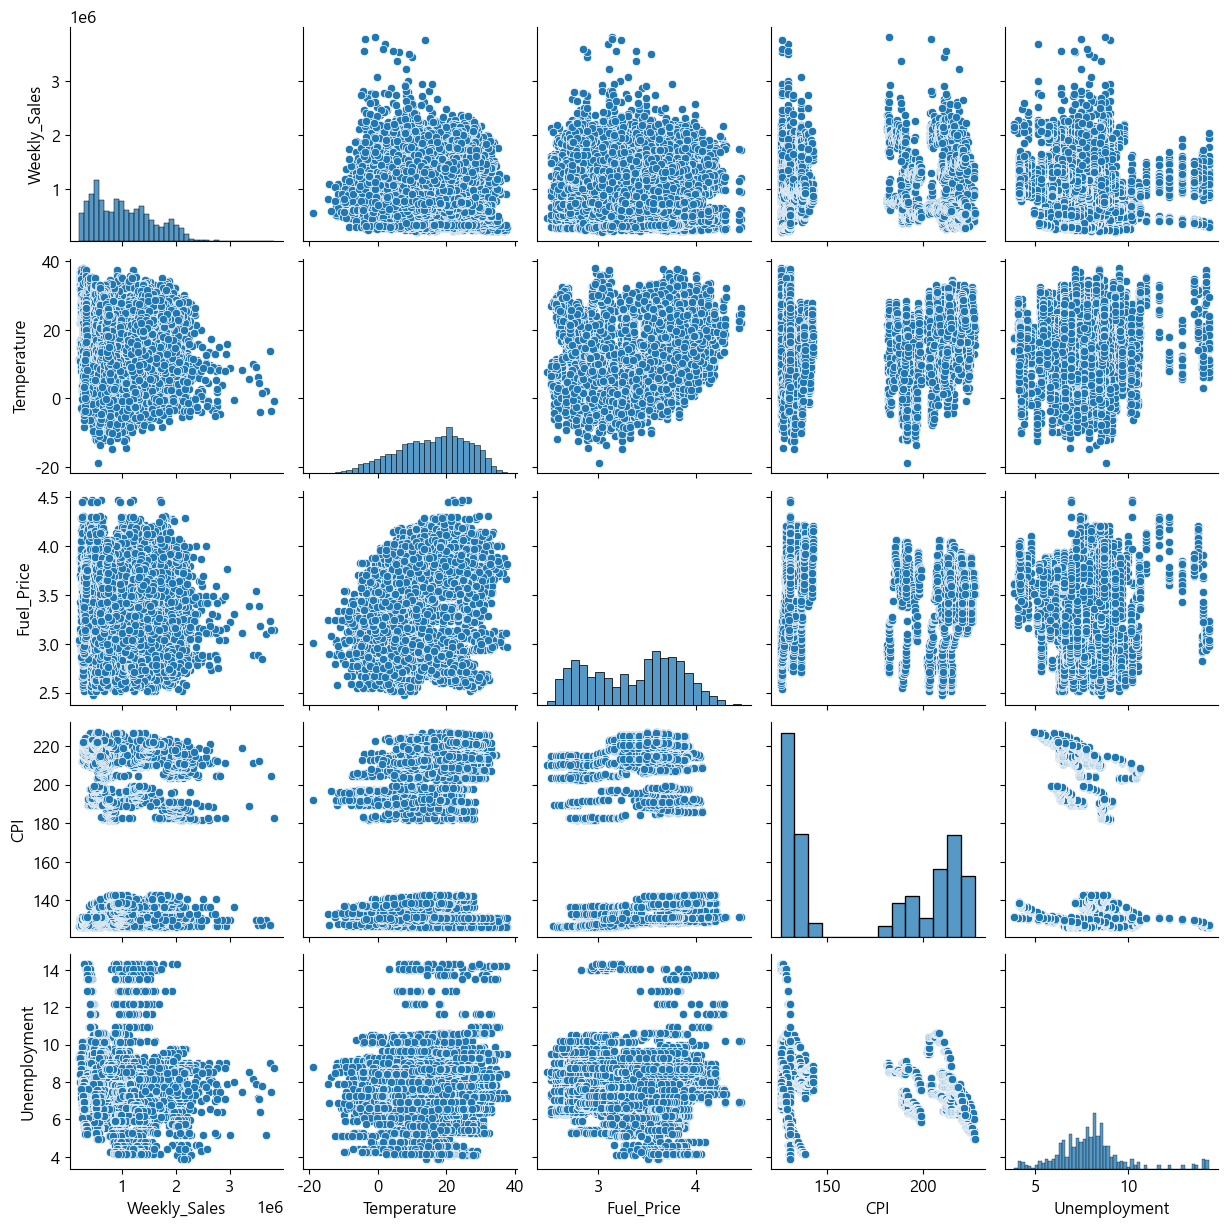

In [23]:
sb.pairplot(df)
plt.show()

#### 매출 분포 확인

- 히스토그램 / kdeplot
  - 전체 매출 데이터로 데이터 확인
  - 데이터 개수는 6435개로 히스토그램의 범위는 13~17개로 한다 (15개)

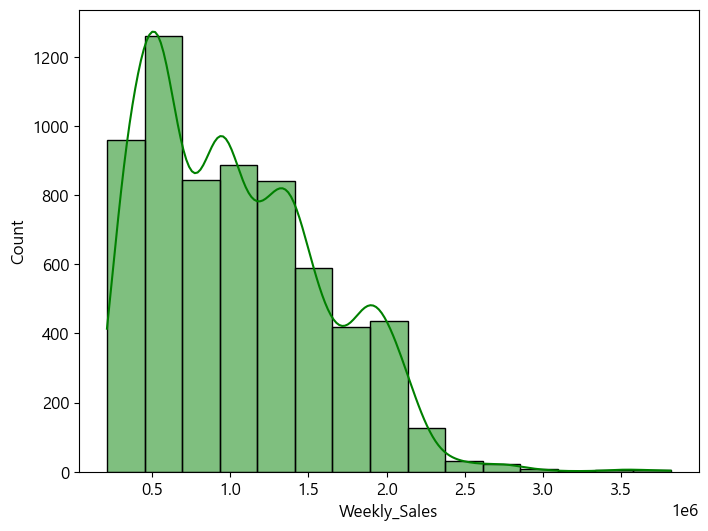

In [24]:
plt.figure()
sb.histplot(data = df, x = 'Weekly_Sales', bins = 15, color = 'green', kde = True)
plt.show()

- 데이터는 정규분포를 따른다고 보기 어렵다

#### Store별로 매출의 차이가 있는지 확인
  - Store의 개수는 같음
  - 시각화로 막대그래프 사용

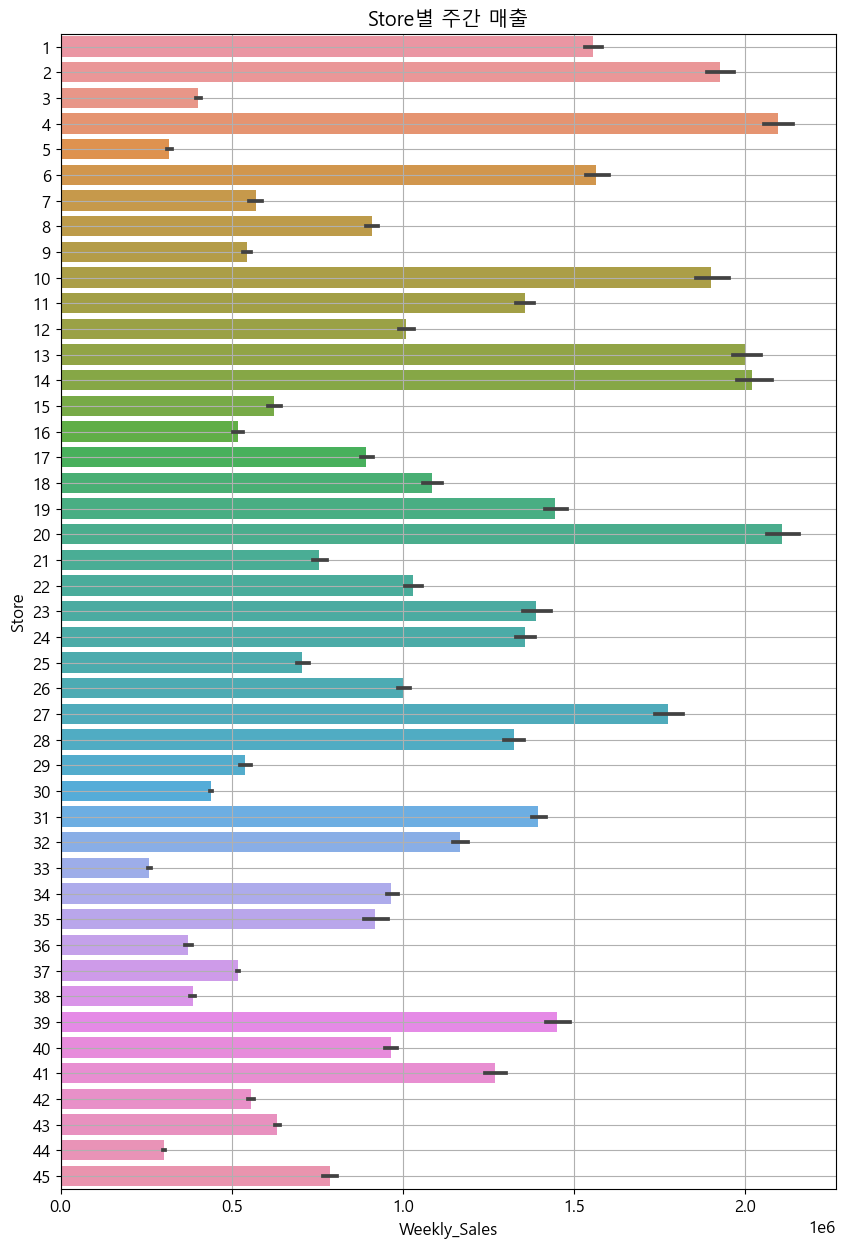

In [25]:
plt.figure(figsize = (10, 15))
sb.barplot(data = df, x = 'Weekly_Sales', y = 'Store')
plt.xlabel("Weekly_Sales")
plt.ylabel("Store")
plt.grid()
plt.title("Store별 주간 매출")
plt.show()

- 지점별로 유의미한 매출의 차이가 있음

#### 휴일 여부에 따른 매출 차이 확인
- 막대그래프 사용

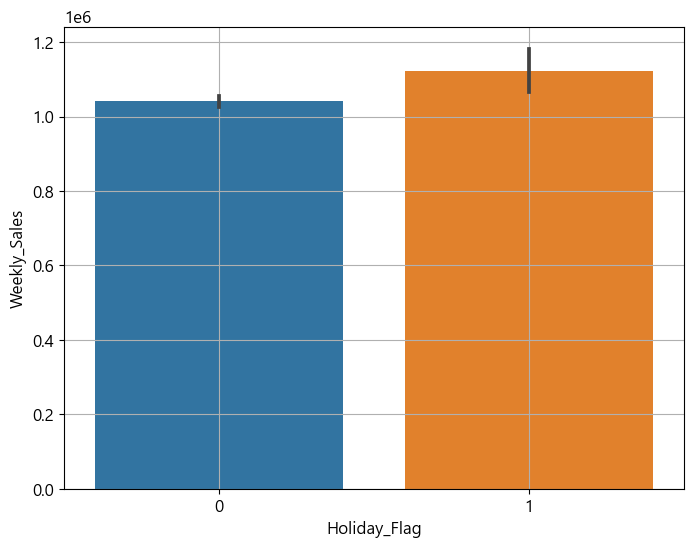

In [26]:
plt.figure()
sb.barplot(data = df, x = 'Holiday_Flag', y = 'Weekly_Sales')
plt.grid()
plt.show()

- 휴일(1)이 평일(0)보다 평균 매출은 더 높은 것으로 보인다. 다만 신뢰구간은 휴일이 평일보다 훨씬 넓게 분포되어 있다.

#### 온도별 매출 확인
- 산점도로 확인
  - 전체 데이터를 시각화하면 데이터 개수가 너무 많아 추세 확인이 어려워 전체 데이터의 1/10만큼 무작위 추출하여 산점도 확인

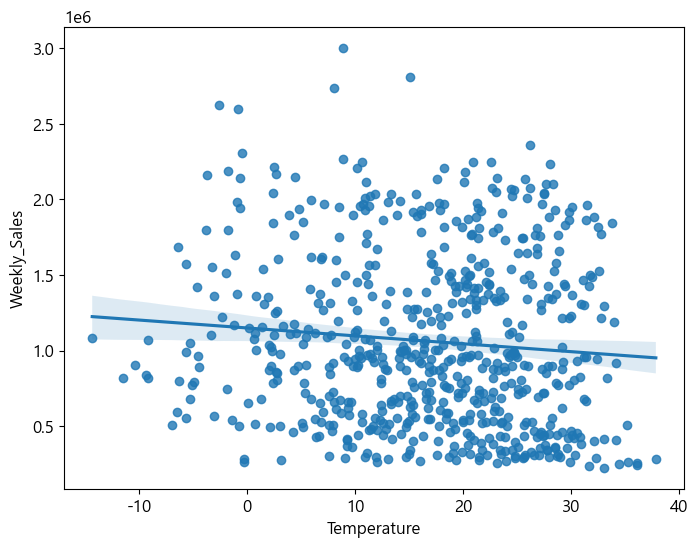

In [27]:
plt.figure()
sb.regplot(data = df.sample(n = int(len(df)/10)), x = 'Temperature', y = 'Weekly_Sales')
plt.show()

- 그래프상으로는 기온과 매출 간에는 뚜렷한 상관관계를 확인하기 어려움

#### 연료비-매출 관계 확인
- 산점도로 확인
  - 전체 데이터를 시각화하면 데이터 개수가 너무 많아 추세 확인이 어려워 전체 데이터의 1/10만큼 무작위 추출하여 산점도 확인

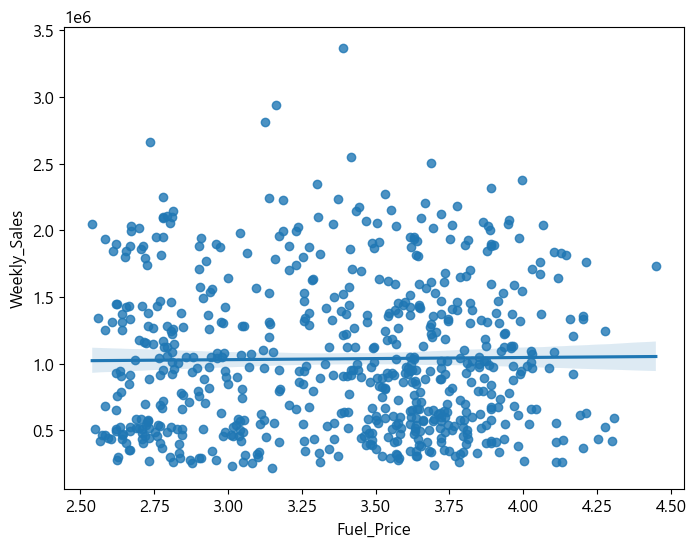

In [28]:
plt.figure()
sb.regplot(data = df.sample(n = int(len(df)/10)), x = 'Fuel_Price', y = 'Weekly_Sales')
plt.show()

- 기름값과 매출 간에서도 뚜렷한 상관관계는 나타나지 않음

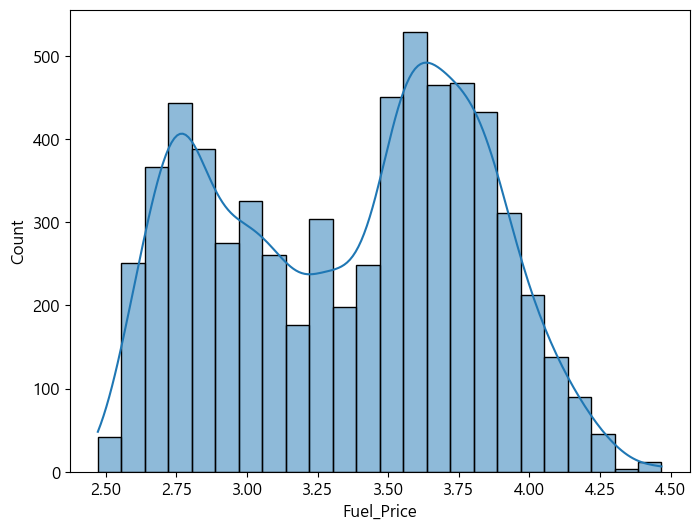

In [29]:
plt.figure()
sb.histplot(data = df, x = 'Fuel_Price', kde = True)
plt.show()

- 기름값의 분포는 다소 기형적으로 날짜별 연료비의 추이를 확인할 필요가 있음

#### 날짜별 연료비 추이

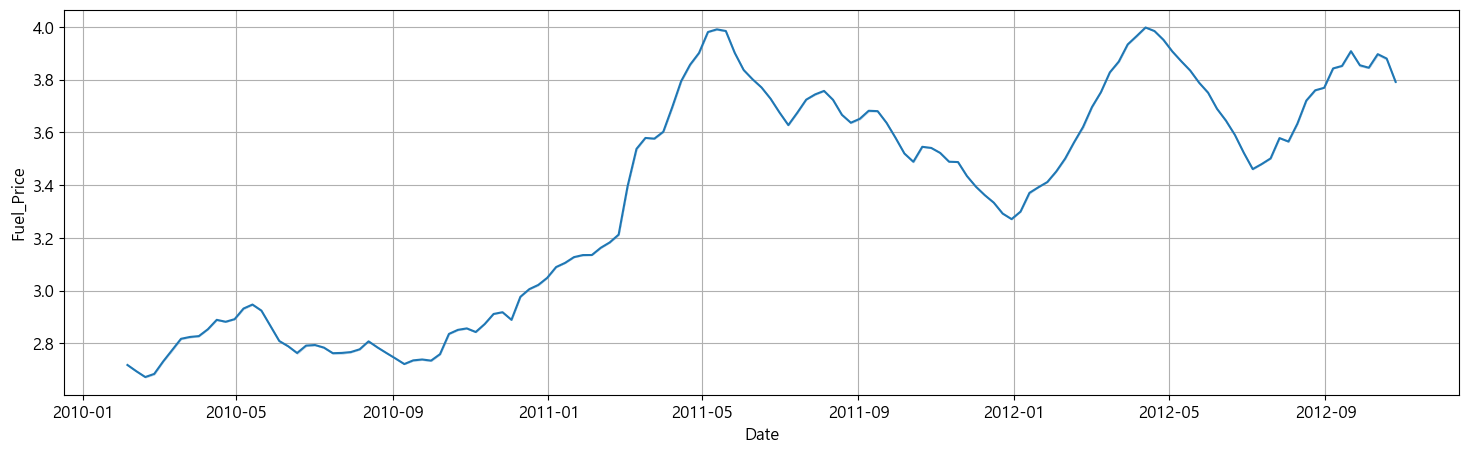

In [30]:
plt.figure(figsize = (18, 5))
sb.lineplot(data = df, x = 'Date', y = 'Fuel_Price', ci = 0)
plt.grid()
plt.show()

- 미국-이란 관계 악화 등 중동 이슈로 유가는 2010년 이후로 상승하는 경향이 있었음
  - 2012년 초 잠시 유가는 잠시 안정화되었으나 이내 다시 상승함

#### 날짜별 매출 추이

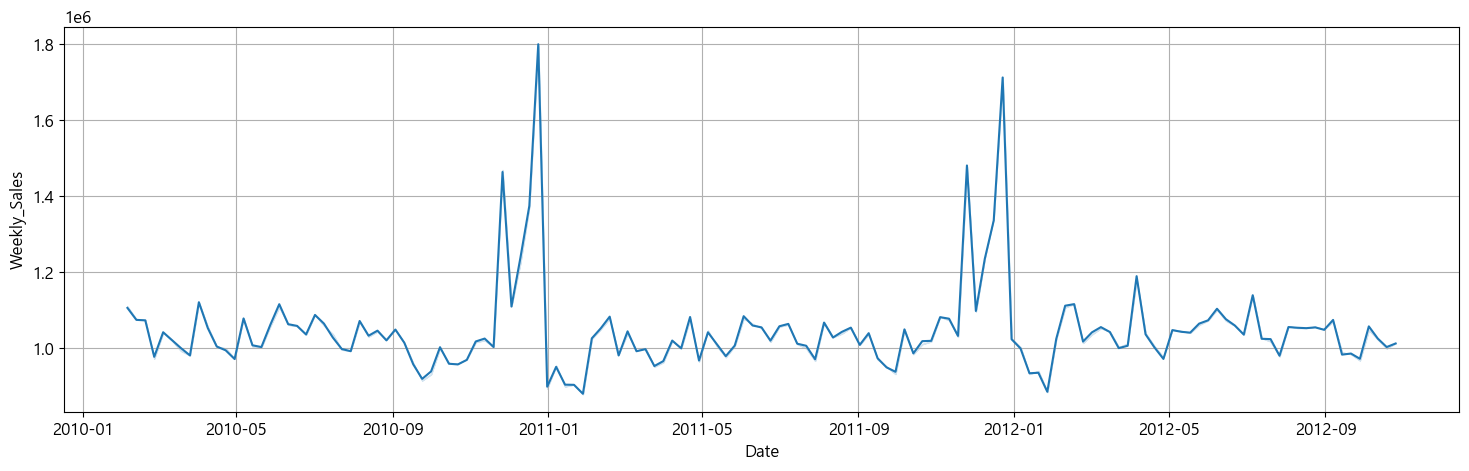

In [31]:
plt.figure(figsize = (18, 5))
sb.lineplot(data = df, x = 'Date', y = 'Weekly_Sales', ci = 0)
plt.grid()
plt.show()

- 매년 11월, 12월 경 매출이 급상승하는 경향이 있음
  - 각각 블랙프라이데이 및 크리스마스 시즌이므로 매출이 뛰는 것으로 추측됨

#### CPI-매출 관계 확인
- 산점도로 확인
  - 전체 데이터를 시각화하면 데이터 개수가 너무 많아 추세 확인이 어려워 전체 데이터의 1/10만큼 무작위 추출하여 산점도 확인

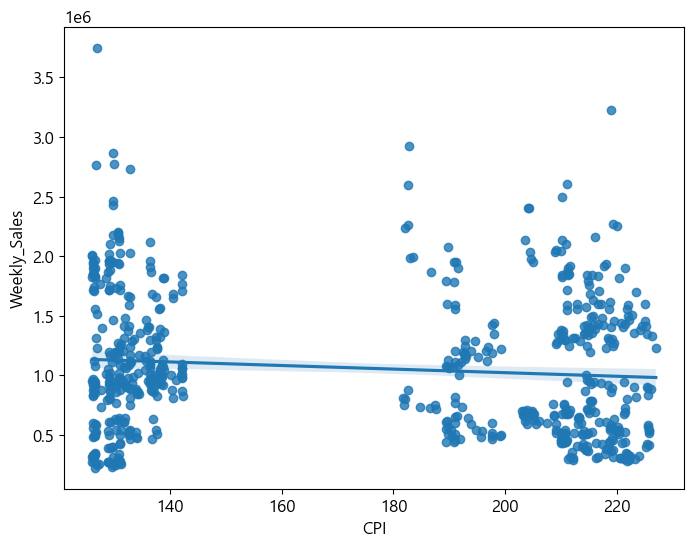

In [32]:
plt.figure()
sb.regplot(data = df.sample(n = int(len(df)/10)), x = 'CPI', y = 'Weekly_Sales')
plt.show()

- CPI는 매출과 큰 상관이 없어보임, CPI의 분포가 불균형적이므로 날짜별 CPI 변화 확인 필요

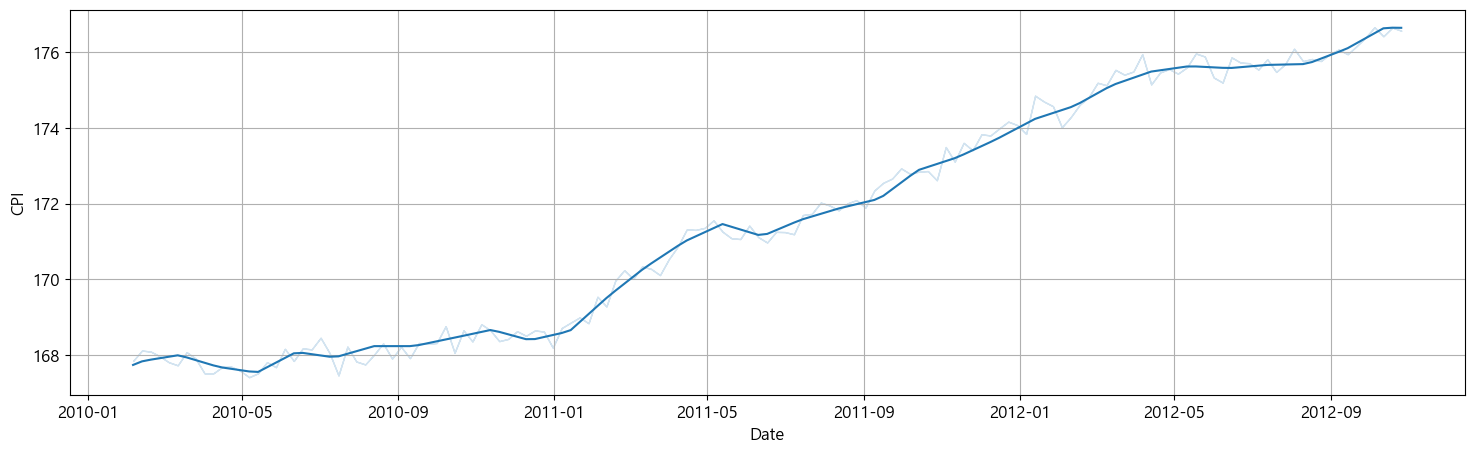

In [33]:
plt.figure(figsize = (18, 5))
sb.lineplot(data = df, x = 'Date', y = 'CPI', ci = 0)
plt.grid()
plt.show()

- CPI는 증가하는 추세

#### 실업률-매출 관계 확인
- 산점도로 확인
  - 전체 데이터를 시각화하면 데이터 개수가 너무 많아 추세 확인이 어려워 전체 데이터의 1/10만큼 무작위 추출하여 산점도 확인

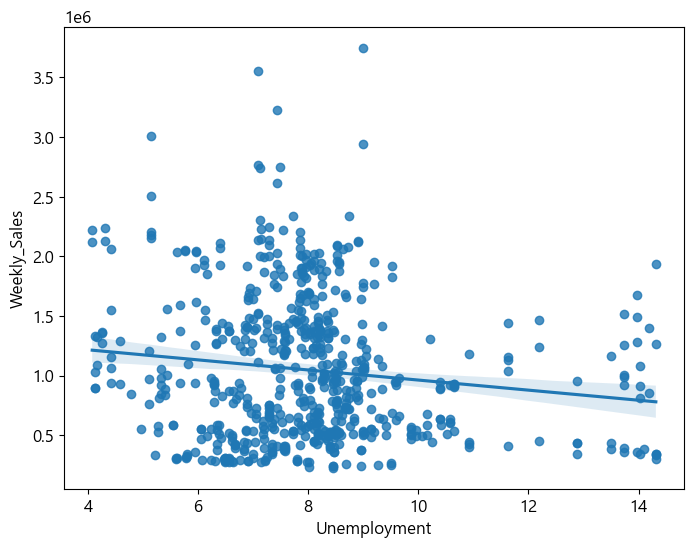

In [34]:
plt.figure()
sb.regplot(data = df.sample(n = int(len(df)/10)), x = 'Unemployment', y = 'Weekly_Sales')
plt.show()

- 실업률이 높을수록 매출은 다소 감소하는 추세를 보임

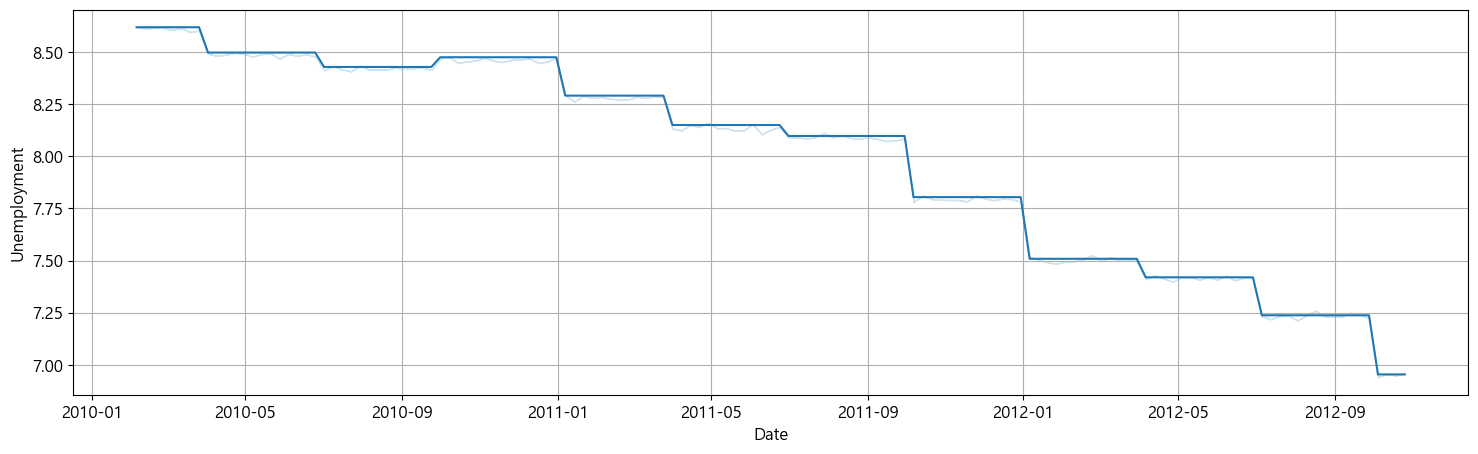

In [35]:
plt.figure(figsize = (18, 5))
sb.lineplot(data = df, x = 'Date', y = 'Unemployment', ci = 0)
plt.grid()
plt.show()

- 실업률은 시간이 갈수록 감소하는 추세를 보임

#### 분산분석
- Store / Holiday_Flag를 기준으로 분산분석을 수행

In [36]:
cols = ['Store', 'Holiday_Flag']

for i in cols:
    tmp = df[[i, 'Weekly_Sales']]
    my_anova(data = df, hue = i, target = 'Weekly_Sales')

pingouin.anova
+----+----------+-------------+------+-------------+--------+---------+----------+
|    | Source   |          SS |   DF |          MS |      F |   p-unc |      np2 |
|----+----------+-------------+------+-------------+--------+---------+----------|
|  0 | Store    | 1.88005e+15 |   44 | 4.27284e+13 | 1613.3 |       0 | 0.917415 |
|  1 | Within   |  1.6924e+14 | 6390 | 2.64851e+10 |    nan |     nan |      nan |
+----+----------+-------------+------+-------------+--------+---------+----------+

statsmodels.anova.anova_lm
+----------+------+-------------+-------------+--------+----------+
|          |   df |      sum_sq |     mean_sq |      F |   PR(>F) |
|----------+------+-------------+-------------+--------+----------|
| C(Store) |   44 | 1.88005e+15 | 4.27284e+13 | 1613.3 |        0 |
| Residual | 6390 |  1.6924e+14 | 2.64851e+10 |    nan |      nan |
+----------+------+-------------+-------------+--------+----------+
[anova_lm] statistic: 1613.299, p-value: 0.000, 대립가

In [37]:
tmp = df[['Store', 'Holiday_Flag', 'Weekly_Sales']]
my_anova(data = df, hue = cols, target = 'Weekly_Sales')

pingouin.anova
+----+----------------------+-------------+------+-------------+---------+-------------+------------+
|    | Source               |          SS |   DF |          MS |       F |       p-unc |        np2 |
|----+----------------------+-------------+------+-------------+---------+-------------+------------|
|  0 | Store                | 1.88005e+15 |   44 | 4.27284e+13 | 1641.77 |           0 |   0.919257 |
|  1 | Holiday_Flag         | 2.78897e+12 |    1 | 2.78897e+12 | 107.162 | 6.47217e-25 |  0.0166086 |
|  2 | Store * Holiday_Flag | 1.31711e+12 |   44 | 2.99342e+10 | 1.15017 |    0.229983 | 0.00791288 |
|  3 | Residual             | 1.65134e+14 | 6345 | 2.60258e+10 |     nan |         nan |        nan |
+----+----------------------+-------------+------+-------------+---------+-------------+------------+

statsmodels.anova.anova_lm
+--------------------------+-------------+------+---------+-------------+
|                          |      sum_sq |   df |       F |      PR

- Store별 평일 / 주말간 매출 시각화

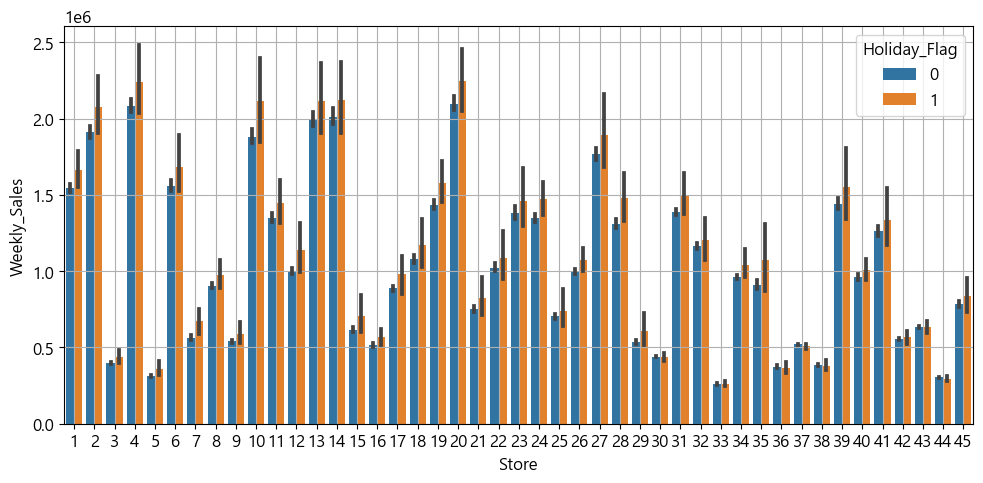

In [38]:
my_barplot(df, xname = 'Store', yname = 'Weekly_Sales', hue = 'Holiday_Flag', dpi = 100)

#### 상관계수 확인

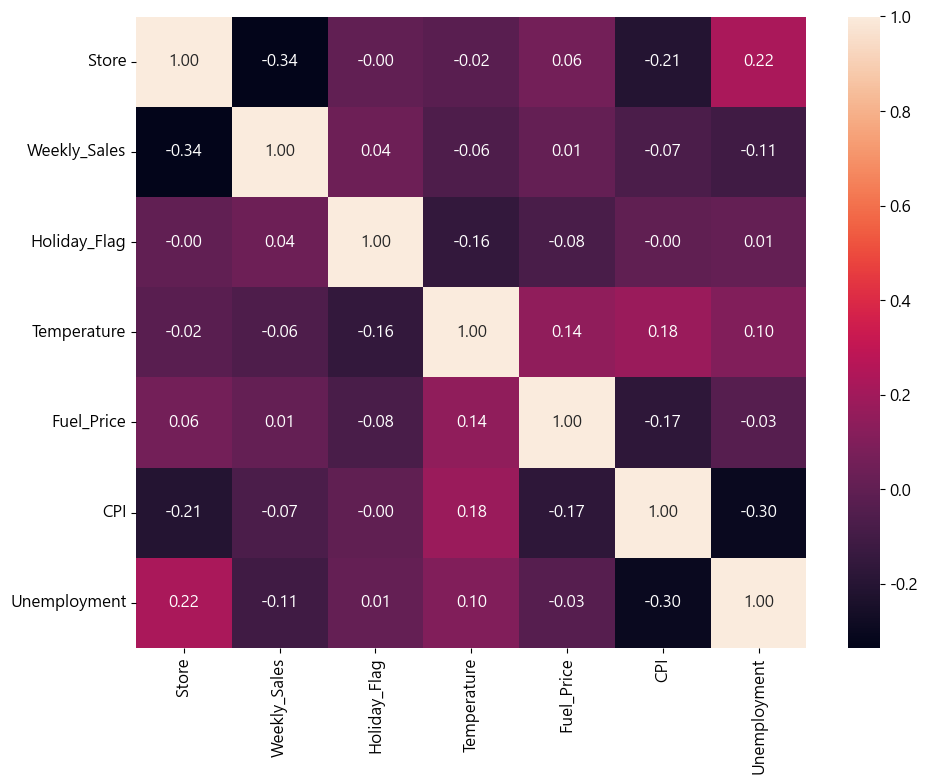

+----------------------------------+---------------+--------------+----------+
|                                  |   correlation |      p-value | result   |
|----------------------------------+---------------+--------------+----------|
| ('Store', 'Weekly_Sales')        |     -0.335332 | 6.88308e-169 | True     |
| ('Store', 'Holiday_Flag')        |  -3.68629e-18 |            1 | False    |
| ('Store', 'Temperature')         |    -0.0226591 |     0.069132 | False    |
| ('Store', 'Fuel_Price')          |      0.060023 |  1.44745e-06 | True     |
| ('Store', 'CPI')                 |     -0.209492 |  9.62053e-65 | True     |
| ('Store', 'Unemployment')        |      0.223531 |   1.1085e-73 | True     |
| ('Weekly_Sales', 'Store')        |     -0.335332 | 6.88308e-169 | True     |
| ('Weekly_Sales', 'Holiday_Flag') |      0.036891 |    0.0030787 | True     |
| ('Weekly_Sales', 'Temperature')  |      -0.06381 |  3.00765e-07 | True     |
| ('Weekly_Sales', 'Fuel_Price')   |    0.00946379 |

In [39]:
my_correlation(data = df.drop('Date', axis = 1), dpi = 100)

- 종속변수보다는 독립변수끼리의 상관계수가 더 높은 경우가 있음
  - 적합한 선형회귀 모델을 찾기 위해서는 적합한 피쳐 엔지니어링이 필요할 것으로 보임

#### 선형 회귀 모델 생성

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 315.9 KB


In [41]:
X = df.copy()
Y = X.pop('Weekly_Sales')

- 종속변수의 단위가 커 로그 변환 수행

In [42]:
Y = np.log(Y)

In [43]:
X_p = pp.fit_transform(X, datetime = 'Date')

데이터프레임 크기 : (6435, 7)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 총 4개
명목형 데이터 컬럼 : ['Store', 'Holiday_Flag'], 총 2개
기타 데이터 컬럼 : ['Date'], 총 1개
시계열 데이터 컬럼명 : Date


In [44]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.2, random_state = 0)

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.957638 |
+----+-------------------+

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.958674 |     0.956858 |
| 평균절대오차(MAE)             |    0.0822881 |    0.0826197 |
| 평균제곱오차(MSE)             |    0.0143401 |    0.0147628 |
| 평균오차(RMSE)                |      0.11975 |     0.121502 |
| 평균 절대 백분오차 비율(MAPE) |     0.599995 |     0.602101 |
| 평균 비율 오차(MPE)           |  -0.00757585 |   -0.0100853 |
+-------------------------------+--------------+--------------+

[학습곡선]


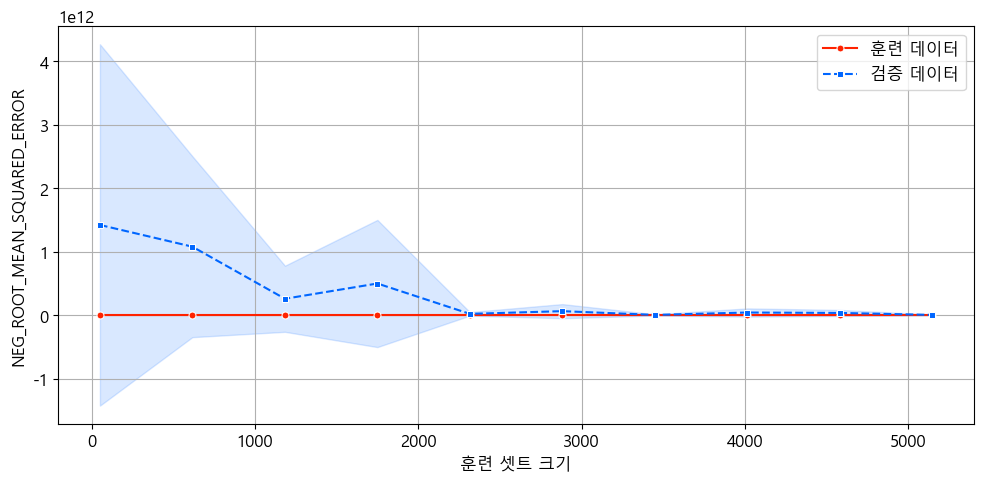

In [45]:
model = my_linear_regression(x_train, y_train, x_test, y_test, cv = 5, dpi = 100, plot = False, report = False)
add_result(model, 'Store 명목화', x_test, y_test)

#### 피쳐 엔지니어링

##### 비닝

- 11, 12월은 각각 블랙프라이데이, 크리스마스 시즌으로 월별 평균 매출을 확인
  - 월을 별도 변수로 생성
  - 월은 서열 척도가 아니기 때문에 category 타입으로 변환

In [46]:
df['month'] = df['Date'].dt.month
df['month'] = df['month'].astype('category')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106,2
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106,2
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,2
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,2
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106,3


In [47]:
monthly_sales = df.groupby('month').mean(numeric_only = True)['Weekly_Sales']

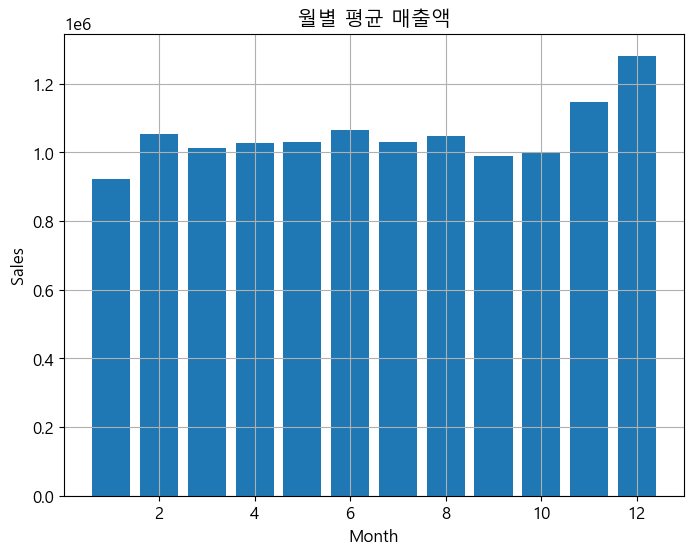

In [48]:
plt.figure()
plt.bar(x = monthly_sales.index, height = monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("월별 평균 매출액")
plt.grid()
plt.show()

- 11 ~ 12월의 매출이 높은 경향이 있고 1월은 낮음

In [49]:
X = df.drop('Weekly_Sales', axis = 1)
X_p = pp.fit_transform(X, datetime = 'Date')

데이터프레임 크기 : (6435, 8)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 총 4개
명목형 데이터 컬럼 : ['Store', 'Holiday_Flag', 'month'], 총 3개
기타 데이터 컬럼 : ['Date'], 총 1개
시계열 데이터 컬럼명 : Date


[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.966722 |
+----+-------------------+

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.967732 |     0.965539 |
| 평균절대오차(MAE)             |    0.0735546 |    0.0737744 |
| 평균제곱오차(MSE)             |    0.0111969 |    0.0117924 |
| 평균오차(RMSE)                |     0.105815 |     0.108593 |
| 평균 절대 백분오차 비율(MAPE) |     0.538475 |     0.539547 |
| 평균 비율 오차(MPE)           |  -0.00595011 |   -0.0131187 |
+-------------------------------+--------------+--------------+

[학습곡선]


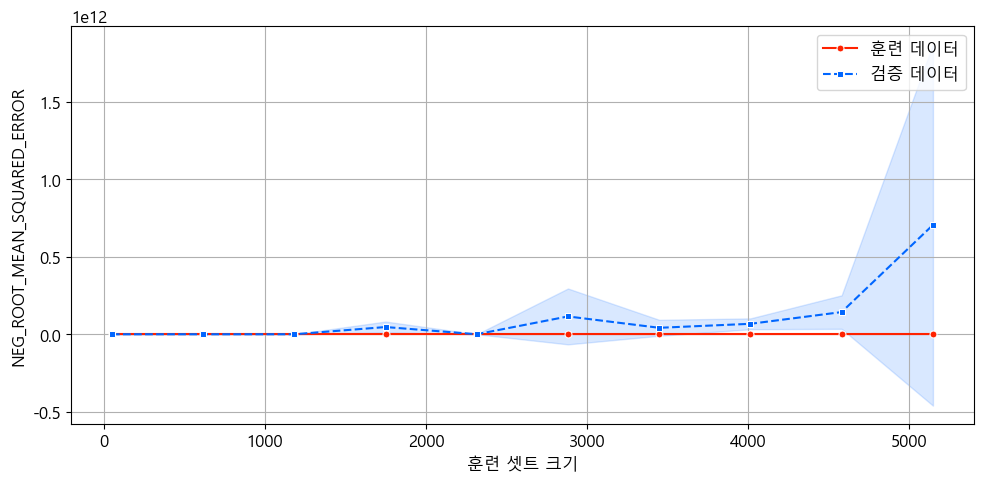

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.2, random_state = 0)
model = my_linear_regression(x_train, y_train, x_test, y_test, cv = 5, dpi = 100, plot = False, report = False)
add_result(model, '월 행 추가', x_test, y_test)

- 월별이 아닌 분기별로 접근해볼 가능성도 있음
    - 분기별 데이터 또한 명목형 데이터로 추가

In [51]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106,2
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106,2
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,2
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,2
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106,3


In [52]:
df['quarter'] = ((df['month'].astype('int') - 1) // 3) + 1
df['quarter'] = df['quarter'].astype('category')

In [53]:
quarter_sales = df.groupby('quarter').mean(numeric_only = True)['Weekly_Sales']

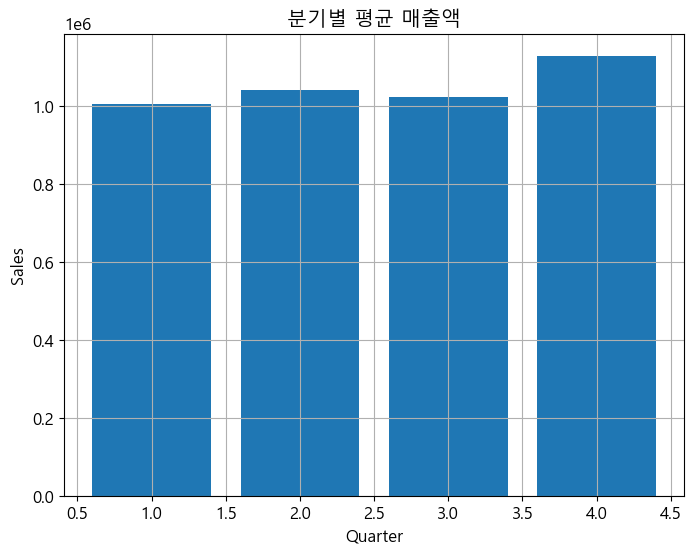

In [54]:
plt.figure()
plt.bar(x = quarter_sales.index, height = quarter_sales.values)
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.title("분기별 평균 매출액")
plt.grid()
plt.show()

In [55]:
X = df.drop('Weekly_Sales', axis = 1)
X_p = pp.fit_transform(X, datetime = 'Date')

데이터프레임 크기 : (6435, 9)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 총 4개
명목형 데이터 컬럼 : ['Store', 'Holiday_Flag', 'month', 'quarter'], 총 4개
기타 데이터 컬럼 : ['Date'], 총 1개
시계열 데이터 컬럼명 : Date


[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.966715 |
+----+-------------------+

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.967732 |     0.965539 |
| 평균절대오차(MAE)             |    0.0735539 |    0.0737736 |
| 평균제곱오차(MSE)             |    0.0111969 |    0.0117922 |
| 평균오차(RMSE)                |     0.105815 |     0.108592 |
| 평균 절대 백분오차 비율(MAPE) |      0.53847 |     0.539543 |
| 평균 비율 오차(MPE)           |  -0.00586974 |   -0.0130629 |
+-------------------------------+--------------+--------------+

[학습곡선]


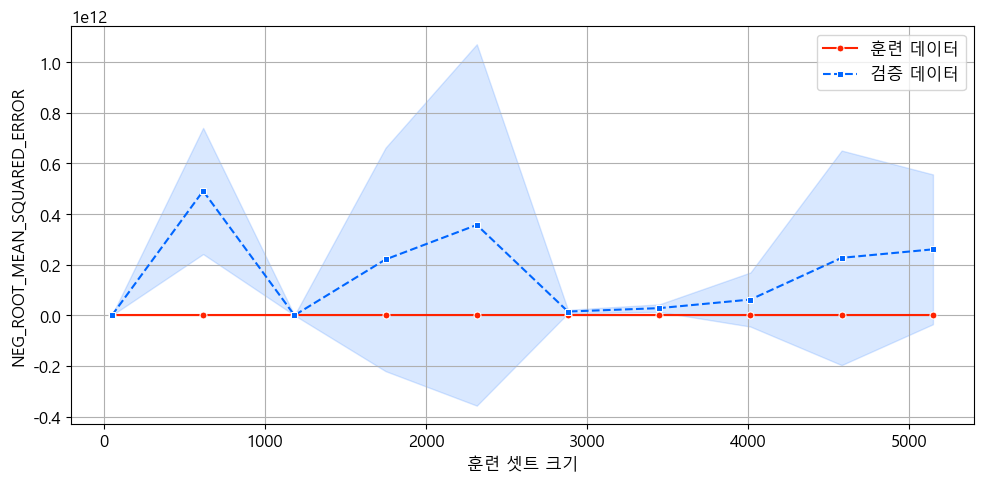

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.2, random_state = 0)
model = my_linear_regression(x_train, y_train, x_test, y_test, cv = 5, dpi = 100, plot = False, report = False)
add_result(model, '분기 행 추가', x_test, y_test)

- CPI와 Sales의 분포를 살펴보았을 때 CPI 100 초반대와, 200 내외 총 3가지 영역으로 데이터 분포가 형성됨
- 실업률 10 기준으로도 Sales의 분포가 다르게 형성됨
  - 해당 기준으로 데이터를 명목형 변수를 생성

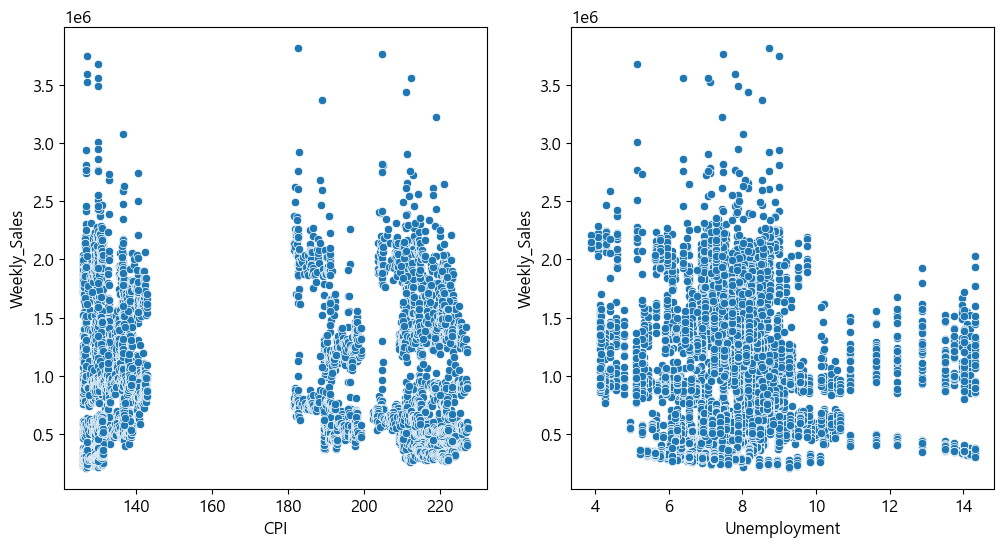

In [57]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sb.scatterplot(data = df, x = 'CPI', y = 'Weekly_Sales', ax = ax[0])
sb.scatterplot(data = df, x = 'Unemployment', y = 'Weekly_Sales', ax = ax[1])
plt.show()

In [58]:
df['CPI_Condition'] = df['CPI'].apply(lambda x : 'Low' if x < 150 else ('High' if x > 200 else 'Mid'))
df['Unemployment_Condition'] = df['Unemployment'].apply(lambda x : 'Low' if x < 10 else 'High')

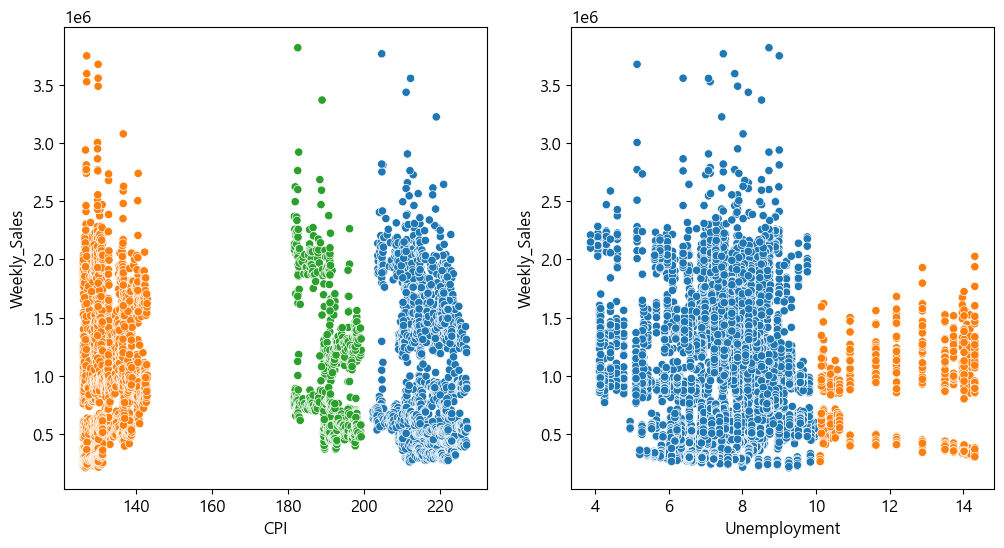

In [59]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sb.scatterplot(data = df, x = 'CPI', y = 'Weekly_Sales', hue = 'CPI_Condition', ax = ax[0], legend = False)
sb.scatterplot(data = df, x = 'Unemployment', y = 'Weekly_Sales', hue = 'Unemployment_Condition', ax = ax[1], legend = False)
plt.show()

In [60]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,quarter,CPI_Condition,Unemployment_Condition
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106,2,1,High,Low
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106,2,1,High,Low
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,2,1,High,Low
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,2,1,High,Low
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106,3,1,High,Low


In [61]:
X = df.drop(['Weekly_Sales'], axis = 1)

데이터프레임 크기 : (6435, 11)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 총 4개
명목형 데이터 컬럼 : ['Store', 'Holiday_Flag', 'month', 'quarter', 'CPI_Condition', 'Unemployment_Condition'], 총 6개
기타 데이터 컬럼 : ['Date'], 총 1개
시계열 데이터 컬럼명 : Date
[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.966714 |
+----+-------------------+

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.967732 |     0.965549 |
| 평균절대오차(MAE)             |    0.0735541 |    0.0737421 |
| 평균제곱오차(MSE)             |    0.0111967 |    0.0117888 |
| 평균오차(RMSE)                |     0.105815 |     0.108576 |
| 평균 절대 백분오차 비율(MAPE) |     0.538468 |     0.539306 |
| 평균 비율 오차(MPE)           |  -0.00594245 |   -0.0130743 |
+-------------------------------+--------------

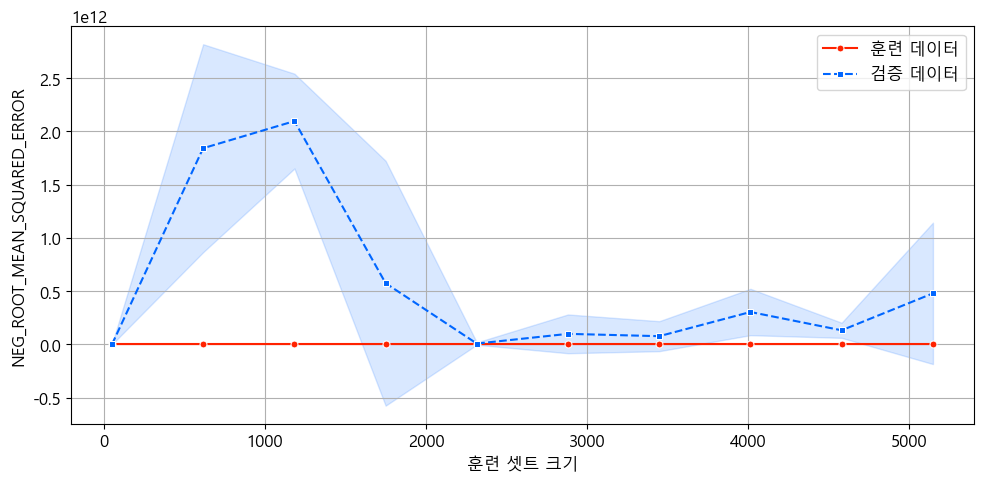

In [62]:
X_p = pp.fit_transform(X, datetime = 'Date')
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.2, random_state = 0)
model = my_linear_regression(x_train, y_train, x_test, y_test, dpi = 100, plot = False, report = False)
add_result(model, 'Binning', x_test, y_test)

##### 다차항 생성

- 2차항을 생성하여 모델 성능 확인
- 연속형 변수에만 적용

In [63]:
cols_n = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
pf = PolynomialFeatures(degree = 2, include_bias = False)

In [64]:
df_n = df[cols_n]
df_o = df.drop(cols_n, axis = 1)
df_n = pd.DataFrame(pf.fit_transform(df_n), columns = pf.get_feature_names_out())
poly_df = pd.concat([df_n, df_o], axis = 1)
poly_df.head()

,Temperature,Fuel_Price,CPI,Unemployment,Temperature^2,Temperature Fuel_Price,Temperature CPI,Temperature Unemployment,Fuel_Price^2,Fuel_Price CPI,...,CPI Unemployment,Unemployment^2,Store,Date,Weekly_Sales,Holiday_Flag,month,quarter,CPI_Condition,Unemployment_Condition
0,5.727778,2.572,211.096358,8.106,32.807438,14.731844,1209.113029,46.429367,6.615184,542.939833,...,1711.147080,65.707236,1,2010-02-05,1643690.90,0,2,1,High,Low
1,3.616667,2.548,211.242170,8.106,13.080278,9.215267,763.992514,29.316700,6.492304,538.245049,...,1712.329028,65.707236,1,2010-02-12,1641957.44,1,2,1,High,Low
2,4.405556,2.514,211.289143,8.106,19.408920,11.075567,930.846057,35.711433,6.320196,531.180905,...,1712.709792,65.707236,1,2010-02-19,1611968.17,0,2,1,High,Low
3,8.127778,2.561,211.319643,8.106,66.060772,20.815239,1717.559098,65.883767,6.558721,541.189605,...,1712.957025,65.707236,1,2010-02-26,1409727.59,0,2,1,High,Low
4,8.055556,2.625,211.350143,8.106,64.891975,21.145833,1702.542818,65.298333,6.890625,554.794125,...,1713.204258,65.707236,1,2010-03-05,1554806.68,0,3,1,High,Low


데이터프레임 크기 : (6435, 21)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Temperature^2', 'Temperature Fuel_Price', 'Temperature CPI', 'Temperature Unemployment', 'Fuel_Price^2', 'Fuel_Price CPI', 'Fuel_Price Unemployment', 'CPI^2', 'CPI Unemployment', 'Unemployment^2'], 총 14개
명목형 데이터 컬럼 : ['Store', 'Holiday_Flag', 'month', 'quarter', 'CPI_Condition', 'Unemployment_Condition'], 총 6개
기타 데이터 컬럼 : ['Date'], 총 1개
시계열 데이터 컬럼명 : Date
[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.967095 |
+----+-------------------+

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.968279 |     0.965449 |
| 평균절대오차(MAE)             |     0.072275 |    0.0729012 |
| 평균제곱오차(MSE)             |     0.011007 |     0.011823 |
| 평균오차(RMSE)        

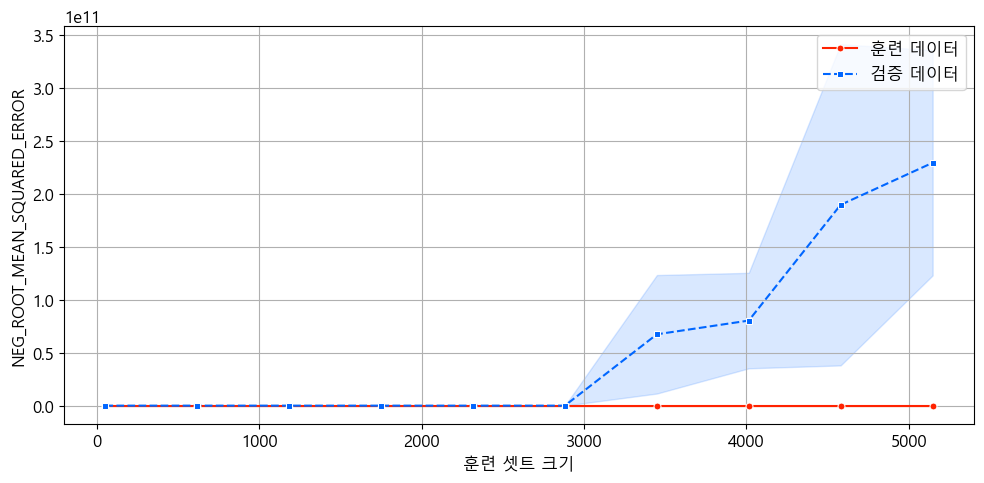

In [65]:
X = poly_df.drop(['Weekly_Sales'], axis = 1)
X_p = pp.fit_transform(X, datetime = 'Date')
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.2, random_state = 0)
model = my_linear_regression(x_train, y_train, x_test, y_test, dpi = 100, plot = False, report = False)
add_result(model, '2차항 생성', x_test, y_test)

#### 오버샘플링
- Holiday_Flag에서 데이터 불균형이 발생하여 오버샘플링으로 데이터 갯수 균일화

In [73]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [74]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\yjg10\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
smote_sampler = SMOTE(sampling_strategy = 'minority', k_neighbors = 3, random_state = 0)

In [ ]:
smote_df = pd.concat([X_p, Y], axis = 1)
smote_df.drop('Holiday_Flag_0', axis = 1, inplace = True)
smote_X = smote_df.drop('Holiday_Flag_1', axis = 1)
smote_Y = smote_df['Holiday_Flag_1']

In [ ]:
x_sm, y_sm = smote_sampler.fit_resample(smote_X, smote_Y)
y_sm.value_counts()

In [ ]:
smote_df = pd.concat([x_sm, y_sm], axis = 1)
smote_X = smote_df.drop('Weekly_Sales', axis = 1)
smote_Y = smote_df['Weekly_Sales']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smote_X, smote_Y, test_size = 0.2, random_state = 0)
model = my_linear_regression(x_train, y_train, x_test, y_test, dpi = 100, use_plot = False, report = False)
add_result(model, 'Holiday_오버샘플링', x_test, y_test)

In [ ]:
pd.DataFrame(results)

- Store 명목화, 월 행 추가, 비닝을 적용한 데이터 재생성

In [ ]:
X_fin = origin.copy()
Y_fin = X_fin.pop('Weekly_Sales')

In [ ]:
# 종속변수 로그변환
Y_fin = np.log(Y_fin)

# Date, Holiday_Flag 데이터타입 변환
X_fin['Date'] = pd.to_datetime(X_fin['Date'], format = '%d-%m-%Y')
X_fin['Holiday_Flag'] = X_fin['Holiday_Flag'].astype('bool')

# Store 명목형 데이터 변환
X_fin['Store'] = X_fin['Store'].astype('category')

# 월 행 추가
X_fin['month'] = X_fin['Date'].dt.month
X_fin['month'] = X_fin['month'].astype('category')

# 연속형 데이터 비닝
X_fin['CPI_Condition'] = X_fin['CPI'].apply(lambda x : 'Low' if x < 150 else ('High' if x > 200 else 'Mid'))
X_fin['Unemployment_Condition'] = X_fin['Unemployment'].apply(lambda x : 'Low' if x < 10 else 'High')

In [ ]:
# 데이터 전처리
pp_fin = YjkPreprocessor()
pp_fin.set_strategy(outline = None, null = None)

In [ ]:
X_fin_p = pp_fin.fit_transform(X_fin, datetime = 'Date')
X_fin_p['Holiday_Flag'] = X_fin_p['Holiday_Flag'].astype('int')

In [ ]:
# 모델 훈련
x_train, x_test, y_train, y_test = train_test_split(X_fin_p, Y_fin, test_size = 0.2, random_state = 0)
model_fin = my_linear_regression(x_train, y_train, x_test, y_test, dpi = 100, use_plot = False, report = True)

In [ ]:
# VIF / 유의확률 기반 변수 소거
ignore = ['CPI', 'Unemployment', 'Temperature', 'Fuel_Price']

x_train_ignore = x_train.drop(ignore, axis = 1)
x_test_ignore = x_test.drop(ignore, axis = 1)
model_fin = my_linear_regression(x_train_ignore, y_train, x_test_ignore, y_test, dpi = 100, use_plot = False, report = True)

In [ ]:
ignore_results = pd.DataFrame()
ignore_li = []

for i, v in enumerate(ignore):
    ignore_li.append(v)
    x_train_ignore = x_train.drop(ignore_li, axis = 1)
    x_test_ignore = x_test.drop(ignore_li, axis = 1)

    lr = LinearRegression()
    lr.fit(x_train_ignore, y_train)

    ignore_results.loc[i, 'Deleted'] = v
    ignore_results.loc[i, 'R2_Score'] = r2_score(y_test, lr.predict(x_test_ignore))
    if i == 0:
        ignore_results.loc[i, 'R2_Delta'] = np.nan
    else:
        ignore_results.loc[i, 'R2_Delta'] = ignore_results.loc[i, 'R2_Score'] - ignore_results.loc[i-1, 'R2_Score']
    ignore_results.loc[i, 'MAE'] = mean_absolute_error(y_test, lr.predict(x_test_ignore))
    if i == 0:
        ignore_results.loc[i, 'MAE_Delta'] = np.nan
    else:
        ignore_results.loc[i, 'MAE_Delta'] = ignore_results.loc[i, 'MAE'] - ignore_results.loc[i-1, 'MAE']
    ignore_results.loc[i, 'RMSE'] = np.sqrt(mean_squared_error(y_test, lr.predict(x_test_ignore)))
    if i == 0:
        ignore_results.loc[i, 'RMSE_Delta'] = np.nan
    else:
        ignore_results.loc[i, 'RMSE_Delta'] = ignore_results.loc[i, 'RMSE'] - ignore_results.loc[i-1, 'RMSE']

In [ ]:
pd.options.display.float_format = '{:.6f}'.format
ignore_results

- 회귀분석 평가
  - 결정계수는 0.96대로 높은 점수를 확보
  - 연속형 변수보다는 더미화된 명목형 변수가 종속변수를 예측하는 주요한 변수가 되었음
  - 더미화된 Store에서 특히 두드러지는 현상
    - 신규 지역에 입점을 목표로 매출 예측하기에 적합한 모델은 아님

In [ ]:
model_fin = my_linear_regression(x_train_ignore, y_train, x_test_ignore, y_test, dpi = 100, use_plot = False, report = True, resid_test = True)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
df_log = df.copy()
df_log['Weekly_Sales'] = np.log(df_log['Weekly_Sales'])

fig, ax = plt.subplots(4, 4, figsize = (18, 18))
fig.subplots_adjust(wspace = 0.25, hspace = 0.3)
for i, v in enumerate(cols):
    tmp = df_log[['Weekly_Sales', v]]
    for j in range(2, 6):
        km = KMeans(n_clusters = j, random_state = 0)
        km.fit(tmp)
        tmp2 = pd.concat([tmp, pd.DataFrame(pd.Series(km.labels_, name = 'Cluster'))], axis = 1)
        sb.scatterplot(data = tmp2, x = v, y = 'Weekly_Sales', hue = 'Cluster', ax = ax[i, j-2], legend = False)
        ax[i, j-2].set_title(f"{j} clusters on {v}")

plt.show()

## 문제 2

### 데이터 읽기

In [ ]:
origin = pd.read_csv("./data/Used_Car_Dataset.csv", index_col = 0)
df = origin.copy()

### EDA(1)

#### 상위 5개 데이터 샘플 및 크기

In [ ]:
df.head()

In [ ]:
df.shape

#### 데이터 타입

In [ ]:
df.info()

#### 기술통계

In [ ]:
df.describe()

In [ ]:
df.describe(include = 'O')

- 종속변수는 price(in lakhs)
- seats 열은 좌석 수로, 이산형 데이터이다. 수치형과 명목형 어느쪽으로든 분석할 수 있다.
- kms_driven, mileage, engine, max_power, torque는 연속형 데이터이다.
    - engine과 max_power의 경우 완전히 동일한 데이터로 한쪽은 삭제한다.
    - 수치형 데이터의 경우 상식적으로 판단하였을 때 이상치로 보이는 데이터가 존재한다 (좌석수 67000개)
        - 해당 데이터의 경우 별도의 정제가 필요하다
- car_name은 총 데이터 수 대비 종류수가 너무 많아 분석에 유의하지 않은 데이터일 확률이 높다
- registration_year, manufacturing_year의 수치형 데이터일 가능성이 높으나 명목형 데이터로 구분되었다.
  - 특정 데이터에 의하여 명목형 데이터가 되었을 가능성이 있다.
- 그외 명목형 데이터의 경우 데이터 종류 수가 많지 않아 분석에 충분히 활용이 가능할 것으로 보인다.

In [ ]:
df.drop('max_power(bhp)', axis = 1, inplace = True)

#### 결측치 확인

In [ ]:
df.isnull().sum()

- 결측치 갯수는 적기 때문에 제거

In [ ]:
df.dropna(inplace = True)

#### 이상치 확인 (Boxplot)

In [ ]:
plt.figure()
sb.boxplot(data = df['price(in lakhs)'])
plt.show()

- 종속변수가 지나치게 큰 이상치가 2개 존재하는 것으로 보이며 해당 데이터는 삭제한다

In [ ]:
df = df[df['price(in lakhs)'] < 10000]

In [ ]:
plt.figure()
sb.boxplot(data = df['price(in lakhs)'])
plt.show()

In [ ]:
plt.figure()
sb.boxplot(data = df[['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'torque(Nm)']])
plt.show()

- 데이터 상세 확인 결과 데이터가 적합하지 않은 행에 들어가서 이상치로 감지되는 경우가 있는 것으로 추측된다.
    - ex) fuel_type에 seats가 들어가 있는 등
    - 해당 데이터는 올바른 위치로 데이터를 옮겨주는 전처리 작업이 요구됨

#### 데이터 전처리

- 잘못된 행에 기입된 데이터의 처리
    - 올바른 행에 데이터를 옮기더라도 남겨진 값은 결측치로 처리되기에 해당 데이터 수가 많지 않은 경우는 삭제 처리

In [ ]:
df.info()

In [ ]:
df['registration_year'].unique()

- Registration_year의 Third Party insurance (insurance_validity행 추정) 삭제

In [ ]:
df = df[df['registration_year'] != 'Third Party insurance']

In [ ]:
df['ownsership'].unique()

In [ ]:
df['ownsership'].value_counts()

- ownsership의 경우 cc가 포함된 데이터는 engine(cc)데이터로 추정되어 해당 값으로 이전한다. ownsership 행에서는 최빈값인 First Owner로 값을 대체한다

In [ ]:
cond = df[df['ownsership'].str.contains('cc')]
cond.head()

In [ ]:
df.loc[cond.index, 'engine(cc)'] = cond['ownsership'].apply(lambda x : int(x[:-2].strip()))
df.loc[cond.index, 'ownsership'] = 'First Owner'

In [ ]:
df['transmission'].value_counts()

- transmission의 경우 특정 연도가 적혀있는 데이터가 있으며 이는 최빈값인 Manual로 대체한다

In [ ]:
cond = df[df['transmission'].str.contains('20')]
df.loc[cond.index, 'transmission'] = 'Manual'

In [ ]:
df['manufacturing_year'].value_counts()

- manufacturing_year의 경우 Power가 포함된 문자열 데이터를 대체해야 하지만 하나의 특정 값으로 대체하기는 어려워 registration_year 열의 값으로 대체함

In [ ]:
cond = df[df['manufacturing_year'].str.contains('Power')]
df.loc[cond.index, 'manufacturing_year'] = cond['registration_year']

In [ ]:
df['manufacturing_year'] = df['manufacturing_year'].astype('int')

- 데이터 전처리 : 데이터 형변환
    - registration_year에는 월까지 포함한 데이터가 있으며 해당 월을 제거하고 년도로 데이터를 통일

In [ ]:
cond = df[df['registration_year'].str.contains('-')]
df.loc[cond.index, 'registration_year'] = cond['registration_year'].apply(lambda x : int(x[-2:]) + 2000)

In [ ]:
df['registration_year'] = df['registration_year'].astype('int')

- 데이터 전처리 : 이상치 제거
    - engine의 이상치는 삭제
    - 이후 Boxplot 재확인

In [ ]:
df = df[df['engine(cc)'] < 10000]

In [ ]:
plt.figure()
sb.boxplot(data = df[['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'torque(Nm)']])
plt.show()

- kms_driven 250,000 이상, torque 30,000, mileage 100 이상인 데이터 삭제
    - seats는 명목형 데이터로 간주하여 추가적인 이상치 처리에서 제외
    - 처리후 Boxplot 재확인

In [ ]:
df['seats'] = df['seats'].astype('category')

In [ ]:
rename_dict = {'mileage(kmpl)' : 'mileage',
               'engine(cc)' : 'engine',
               'torque(Nm)' : 'torque',
               'price(in lakhs)' : 'price'}
df.rename(columns = rename_dict, inplace = True)

In [ ]:
df = df.query('kms_driven < 250000 and torque < 30000 and mileage < 100')

In [ ]:
cols = ['kms_driven', 'mileage', 'engine', 'torque']

fig, ax = plt.subplots(1, 4, figsize = (18, 6))
for i, v in enumerate(cols):
    ax[i].boxplot(x = df[v])
    ax[i].set_title(v)
plt.show()

#### 중복데이터 제거
- 모든 내용이 일치하는 중복데이터 제거

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.reset_index(inplace = True, drop = True)
df.head()

### EDA(2)
- 정제한 데이터를 기반으로 특징 재확인

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.describe(include = ['object', 'category'])

- 'car_name' 열은 자동차 모델명이며 데이터 종류 수가 매우 많아 분석에 무의미하다고 판단되어 제거
  - 해당 명칭을 기반으로 차량의 제원 데이터를 외부로부터 가져와 분석에 활용할 수 있으나 고려하지 않음

In [ ]:
df.drop('car_name', axis = 1, inplace = True)

In [ ]:
df.isnull().sum()

#### 산점도 행렬

In [ ]:
sb.pairplot(df)
plt.show()

- 일부 독립변수와 종속변수는 상관관계를 가지고 있음
  - 독립변수끼리 강한 상관관계를 가지고 있는 경우도 있어 다중공선성 방지를 위해 일부 열을 제거할 필요성이 있음

#### 종속변수 분포 확인
- 데이터는 1094개로, 히스토그램 구간 수는 11~13개로 설정 (12개)

In [ ]:
X = df.copy()
Y = X.pop('price')

In [ ]:
plt.figure()
sb.histplot(data = Y, kde = True, bins = 12)
plt.show()

- 종속변수 분포는 정규분포를 따르지 않는 것으로 보임

#### 연속형 독립변수 분포 확인

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (18, 12))
ax = ax.flatten()
tmp = X.select_dtypes('number')

for i, v in enumerate(tmp.columns):
    sb.histplot(data = X[v], bins = 12, ax = ax[i], kde = True)
    ax[i].set_title(v)
plt.show()

#### 분산분석

In [ ]:
col_o = X.select_dtypes(['object', 'category']).columns

In [ ]:
for c in col_o:
    tmp = df[[c, 'price']]
    my_anova(tmp, hue=c, target='price')

#### 명목형 데이터 / 종속변수 상관관계에 대한 시각화

In [ ]:
fig = plt.figure(figsize = (18, 12))
gs = GridSpec(2, 3)
ax0 = fig.add_subplot(gs[0, :2])
ax1 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
axs = [ax0, ax1, ax2, ax3, ax4]

for i, v in enumerate(col_o):
    sb.histplot(data = df, x = 'price', hue = v, bins = 12, ax = axs[i], kde = True)
    axs[i].set_title(v)

plt.show()

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (18, 12))
ax = ax.flatten()

for i, v in enumerate(col_o):
    sb.barplot(data = df, x = v, y = 'price', ax = ax[i])
    ax[i].set_title(v)
    ax[i].grid()
ax[5].set_visible(False)
plt.show()

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (18, 12))
ax = ax.flatten()

for i, v in enumerate(col_o):
    sb.countplot(data = df, x = v, ax = ax[i])
    ax[i].set_title(v)
    ax[i].grid()
ax[5].set_visible(False)
plt.show()

- transmission 열은 종속변수 예측에 매우 유의미한 변수가 될 것으로 예상됨

In [ ]:
fig, ax = plt.subplots(len(col_o), len(col_o), figsize = (24, 28))
fig.subplots_adjust(hspace = 0.5)

for i, v in enumerate(col_o):
    for j, w in enumerate(col_o):
        if i == j:
            sb.histplot(data = df, x = v, ax = ax[i, j], kde = True, bins = 12)
            ax[i, j].set_xticks(range(0, len(df[v].unique())), df[v].unique(), rotation = 45)
            ax[i, j].set_xlabel("")
            ax[i, j].set_ylabel("")
        else:
            sb.countplot(data = df, x = v, hue = w, ax = ax[i, j])
            ax[i, j].set_title(f"{v} and {w}")
            ax[i, j].set_xticks(range(0, len(df[v].unique())), df[v].unique(), rotation = 45)
            ax[i, j].set_xlabel("")
            ax[i, j].set_ylabel("")

plt.show()

#### 상관계수 시각화

In [ ]:
my_correlation(data = df.select_dtypes('number'), dpi = 100)

- manufacturing_year과 registration_year는 매우 강한 상관관계를 보이고 있다
  - 그 외 독립변수 끼리도 상관관계가 어느정도 있음

### 선형 회귀 모델 생성

In [ ]:
results = []

def add_result(model, note, x_test, y_test):
    global results
    tmp_dict = {}
    tmp_dict['How'] = note
    tmp_dict['R2_Score'] = model.score(x_test, y_test)
    tmp_dict['MAE'] = mean_absolute_error(y_test, model.predict(x_test))
    tmp_dict['RMSE'] = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    tmp_dict['model'] = model
    results.append(tmp_dict)

In [ ]:
pp = YjkPreprocessor()
pp.set_strategy(outline = None, null = None)

In [ ]:
X_p = pp.fit_transform(X)
X_p.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)

In [ ]:
model = my_linear_regression(x_train, y_train, x_test, y_test, use_plot = False, report = False)
add_result(model, '기본 데이터', x_test, y_test)

### 데이터 전처리(2)

#### Torque Binning
- Torque가 일정 수치 이하일 경우 price가 낮게 형성되는 경향이 있음
  - 해당 기준으로 명목형 변수를 생성하여 분석모델에 추가

In [ ]:
tor = df[['torque', 'price']]
tor['bin'] = tor['torque'].apply(lambda x : 'high' if x > 4500 else 'low')


fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sb.scatterplot(y = X['torque'], x = Y, ax = ax[0])
sb.scatterplot(data = tor, y = 'torque', x = 'price', hue = 'bin')
plt.show()

- torque 4500을 기준으로 분할
- 이후 회귀분석 실행

In [ ]:
X['torque_bin'] = X['torque'].apply(lambda x : 'high' if x > 4500 else 'low')

In [ ]:
X['torque_bin'].value_counts()

In [ ]:
X_p = pp.fit_transform(X)
X_p.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)
model = my_linear_regression(x_train, y_train, x_test, y_test, use_plot = False, report = False)
add_result(model, 'Binning', x_test, y_test)

#### 명목형 변수 조합
- 교효작용이 있을 수 있는 fuel_type과 transmission을 결합한 새로운 명목형 변수 생성

In [ ]:
X.info()

In [ ]:
X['fuel_trans'] = X['fuel_type'] + "_" + X['transmission']

In [ ]:
X['fuel_trans'].value_counts()

In [ ]:
X_p = pp.fit_transform(X)
X_p.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)
model = my_linear_regression(x_train, y_train, x_test, y_test, use_plot = False, report = False)
add_result(model, 'fuel_trans 추가', x_test, y_test)

- 2개의 명목형 변수를 조합한 파생변수가 추가되어 기존 명목형 변수를 제거할 경우 성능변화 확인

In [ ]:
X_p = pp.fit_transform(X.drop(['fuel_type', 'transmission'], axis = 1))
X_p.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)
model = my_linear_regression(x_train, y_train, x_test, y_test, use_plot = False, report = False)
add_result(model, '명목형 변수 조합 원본 삭제', x_test, y_test)

#### 2차항 생성
- 연속형 변수에 대하여 2차항 생성

In [ ]:
col_n = ['kms_driven', 'mileage', 'engine', 'torque']
pf = PolynomialFeatures(degree = 2, include_bias = False)

In [ ]:
X_n = X[col_n]
X_o = X.drop(col_n, axis = 1)
X_n = pd.DataFrame(pf.fit_transform(X_n), columns = pf.get_feature_names_out())
poly_X = pd.concat([X_n, X_o], axis = 1)
poly_X.head()

In [ ]:
X_p = pp.fit_transform(poly_X)
X_p.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)
model = my_linear_regression(x_train, y_train, x_test, y_test, use_plot = False, report = False)
add_result(model, '2차항 생성', x_test, y_test)

#### Seats 수치 데이터로 변형

In [ ]:
poly_X['seats'] = poly_X['seats'].astype('int')

In [ ]:
X_p = pp.fit_transform(poly_X)
X_p.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)
model = my_linear_regression(x_train, y_train, x_test, y_test, use_plot = False, report = False)
add_result(model, 'Seats 수치형 변환', x_test, y_test)

In [ ]:
pd.DataFrame(results)

### VIF / 유의확률 기반 변수 소거

In [ ]:
poly_X['seats'] = poly_X['seats'].astype('category')
X_p = pp.fit_transform(poly_X)
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)

In [ ]:
# 아래 변수는 삭제하지 않으면 에러 발생 (train / test 한쪽이 모두 0인 열)
ignore_ess = ['insurance_validity_Not Available', 'ownsership_Fifth Owner', 'seats_6', 'seats_8']

ignore = ['registration_year', 'kms_driven^2', 'kms_driven torque', 'mileage^2', 'kms_driven mileage', 'mileage engine', 'engine^2',
         'torque', 'engine torque', 'mileage torque', 'mileage', 'kms_driven']


x_train_ignore = x_train.drop(ignore_ess, axis = 1)
x_test_ignore = x_test.drop(ignore_ess, axis = 1)

x_train_ignore = x_train_ignore.drop(ignore, axis = 1)
x_test_ignore = x_test_ignore.drop(ignore, axis = 1)
model_fin = my_linear_regression(x_train_ignore, y_train, x_test_ignore, y_test, dpi = 100, use_plot = False, report = True)

In [ ]:
ignore_results = pd.DataFrame()
ignore_li = []

for i, v in enumerate(ignore):
    ignore_li.append(v)
    x_train_ignore = x_train.drop(ignore_ess, axis = 1)
    x_test_ignore = x_test.drop(ignore_ess, axis = 1)
    x_train_ignore = x_train_ignore.drop(ignore_li, axis = 1)
    x_test_ignore = x_test_ignore.drop(ignore_li, axis = 1)

    lr = LinearRegression()
    lr.fit(x_train_ignore, y_train)

    ignore_results.loc[i, 'Deleted'] = v
    ignore_results.loc[i, 'R2_Score'] = r2_score(y_test, lr.predict(x_test_ignore))
    if i == 0:
        ignore_results.loc[i, 'R2_Delta'] = np.nan
    else:
        ignore_results.loc[i, 'R2_Delta'] = ignore_results.loc[i, 'R2_Score'] - ignore_results.loc[i-1, 'R2_Score']
    ignore_results.loc[i, 'MAE'] = mean_absolute_error(y_test, lr.predict(x_test_ignore))
    if i == 0:
        ignore_results.loc[i, 'MAE_Delta'] = np.nan
    else:
        ignore_results.loc[i, 'MAE_Delta'] = ignore_results.loc[i, 'MAE'] - ignore_results.loc[i-1, 'MAE']
    ignore_results.loc[i, 'RMSE'] = np.sqrt(mean_squared_error(y_test, lr.predict(x_test_ignore)))
    if i == 0:
        ignore_results.loc[i, 'RMSE_Delta'] = np.nan
    else:
        ignore_results.loc[i, 'RMSE_Delta'] = ignore_results.loc[i, 'RMSE'] - ignore_results.loc[i-1, 'RMSE']

In [ ]:
pd.options.display.float_format = '{:.6f}'.format
ignore_results

- 회귀분석 평가
  - 데이터의 질이 좋지 않음
    - 기입이 잘못된 데이터가 산재해 있고, 기입 기준, 이상치, 중복 데이터 면에서 정제가 필요함
      - 데이터의 질이 좋지 않은 만큼 정제 및 추가적인 전처리 작업 수행시 모델 성능 상승 폭은 큼
      - 데이터 정제 기준에 따른 주관적인 판단에 따라 모델 성능이 추가 개선될 여지가 있음
    - 명목형 변수의 구분별로 무의미할 정도로 데이터의 수가 적은 경우도 많았음
      - 추가적인 데이터 수집으로 부족한 데이터를 채우면 성능이 개선될 것으로 예상

In [ ]:
final = my_linear_regression(x_train_ignore, y_train, x_test_ignore, y_test, dpi = 100, use_plot = False, report = True, resid_test = True)

In [ ]:
from sklearn.linear_model import Ridge, Lasso
rg = Ridge(alpha = 0.1)
la = Lasso(alpha = 0.01)
rg.fit(x_train_ignore, y_train)
la.fit(x_train_ignore, y_train)
rg.score(x_test_ignore, y_test), la.score(x_test_ignore, y_test)

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
xgb = XGBRegressor(max_depth = 9)
lgbm = LGBMRegressor(max_depth = 11, verbose = -1)
cat = CatBoostRegressor(logging_level = 'Silent')

In [ ]:
xgb.fit(x_train_ignore, y_train)
lgbm.fit(x_train_ignore, y_train)
cat.fit(x_train_ignore, y_train)
xgb.score(x_test_ignore, y_test), lgbm.score(x_test_ignore, y_test), cat.score(x_test_ignore, y_test)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
cols = ['registration_year', 'kms_driven', 'manufacturing_year', 'mileage', 'engine', 'torque']
df_log = df.copy()
# df_log['Weekly_Sales'] = np.log(df_log['Weekly_Sales'])

fig, ax = plt.subplots(6, 4, figsize = (20, 24))
fig.subplots_adjust(wspace = 0.25, hspace = 0.5)
for i, v in enumerate(cols):
    tmp = df_log[['price', v]]
    for j in range(2, 6):
        km = KMeans(n_clusters = j, random_state = 0)
        km.fit(tmp)
        tmp2 = pd.concat([tmp, pd.DataFrame(pd.Series(km.labels_, name = 'Cluster'))], axis = 1)
        sb.scatterplot(data = tmp2, x = v, y = 'price', hue = 'Cluster', ax = ax[i, j-2], legend = False)
        ax[i, j-2].set_title(f"{j} clusters on {v}")

plt.show()